In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_avocados = pd.read_csv(r'C:\Users\abraz\OneDrive\Área de Trabalho\avocado_price_prediction\avocados_tratado.csv')
df_avocados = df_avocados.drop(columns=["Unnamed: 0"])

df_avocados.head()

Date  AveragePrice  Total_Volume  Small_Hass  Large_Hass  \
0  2015-01-04          1.22      40873.28     2819.50    28287.42   
1  2015-01-04          1.41       2604.25      220.61       23.64   
2  2015-01-04          1.19     166006.29    29419.03    47220.75   
3  2015-01-04          1.84       3966.00      244.34     2700.02   
4  2015-01-04          1.82       2288.44     1438.04       53.73   

   XLarge_Hass  Total_Bags  Small_Bags  Large_Bags  XLarge_Bags          type  \
0        49.90     9716.46     9186.93      529.53          0.0  conventional   
1         0.00     2360.00     2360.00        0.00          0.0       organic   
2     38568.95    50797.56    44329.03     6468.53          0.0  conventional   
3        76.21      945.43      838.34      107.09          0.0       organic   
4         0.00      796.67      796.67        0.00          0.0       organic   

   year             region  
0  2015             Albany  
1  2015   NewOrleansMobile  
2  2015          Charlotte  
3  2015          Nashville  
4  2015  MiamiFtLauderdale

# EDA

Informações que quero obter nesta etapa:
1. Descrição dos dados
2. Informações dos dados.
3. Visualização.
    1. Distribuição de preço.
    2. Distribuição do volume.
    3. Preço médio do abacate por cidade.
    4. Preço médio do abacate pelo tempo.
    5. Preço médio por tipo de abacate
    6. Contagem dos anos.
    7. Correlação entre variáveis.

## Informação dos dados.

In [3]:
df_avocados.Date = pd.to_datetime(df_avocados.Date)

df_avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21755 entries, 0 to 21754
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          21755 non-null  datetime64[ns]
 1   AveragePrice  21755 non-null  float64       
 2   Total_Volume  21755 non-null  float64       
 3   Small_Hass    21755 non-null  float64       
 4   Large_Hass    21755 non-null  float64       
 5   XLarge_Hass   21755 non-null  float64       
 6   Total_Bags    21755 non-null  float64       
 7   Small_Bags    21755 non-null  float64       
 8   Large_Bags    21755 non-null  float64       
 9   XLarge_Bags   21755 non-null  float64       
 10  type          21755 non-null  object        
 11  year          21755 non-null  int64         
 12  region        21755 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.2+ MB


## Descrição dos dados.


In [4]:
df_avocados.describe()

AveragePrice  Total_Volume    Small_Hass    Large_Hass    XLarge_Hass  \
count  21755.000000  2.175500e+04  2.175500e+04  2.175500e+04   21755.000000   
mean       1.402123  2.636959e+05  8.467897e+04  8.190905e+04    6894.693025   
std        0.393671  5.551905e+05  2.265567e+05  1.783065e+05   20806.881751   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00       0.000000   
25%        1.110000  1.035185e+04  4.593150e+02  1.910825e+03       0.000000   
50%        1.360000  6.933977e+04  5.058040e+03  1.374141e+04      86.000000   
75%        1.640000  3.362519e+05  8.018551e+04  8.885265e+04    3159.150000   
max        3.250000  2.539490e+07  9.153159e+06  8.354516e+06  417270.700000   

         Total_Bags    Small_Bags    Large_Bags    XLarge_Bags          year  
count  2.175500e+04  2.175500e+04  2.175500e+04   21755.000000  21755.000000  
mean   9.018837e+04  6.406715e+04  2.459562e+04    1525.594416   2016.956608  
std    2.015256e+05  1.579755e+05  6.543499e+04    9223.862122      1.406604  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.599340e+03  3.268210e+03  9.814000e+01       0.000000   2016.000000  
50%    2.892515e+04  2.016146e+04  2.403410e+03       0.000000   2017.000000  
75%    9.847557e+04  7.408667e+04  1.848190e+04     176.835000   2018.000000  
max    7.528927e+06  5.513112e+06  1.976739e+06  408007.910000   2019.000000

## Visualização.

### Distribuição de preço.

Text(0.5, 0, 'Preço médio.')

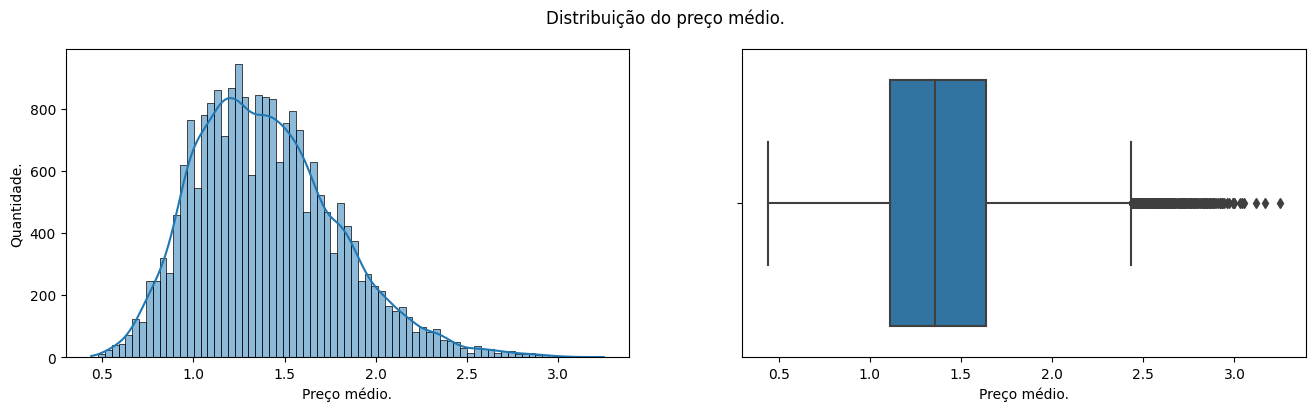

In [5]:
fig, axes = plt.subplots(1,2, figsize=(16,4))

x = df_avocados.AveragePrice

fig.suptitle('Distribuição do preço médio.')

sns.histplot(ax = axes[0], data = df_avocados, x=x, kde=True)
axes[0].set_ylabel("Quantidade.")
axes[0].set_xlabel("Preço médio.")


sns.boxplot(ax = axes[1], data = df_avocados, x=x,)
axes[1].set_xlabel("Preço médio.")


Podemos observar que existem muitos outlier na distribuição de preço médio.

### Distribuição do volume.

Text(0.5, 0, 'Volume total.')

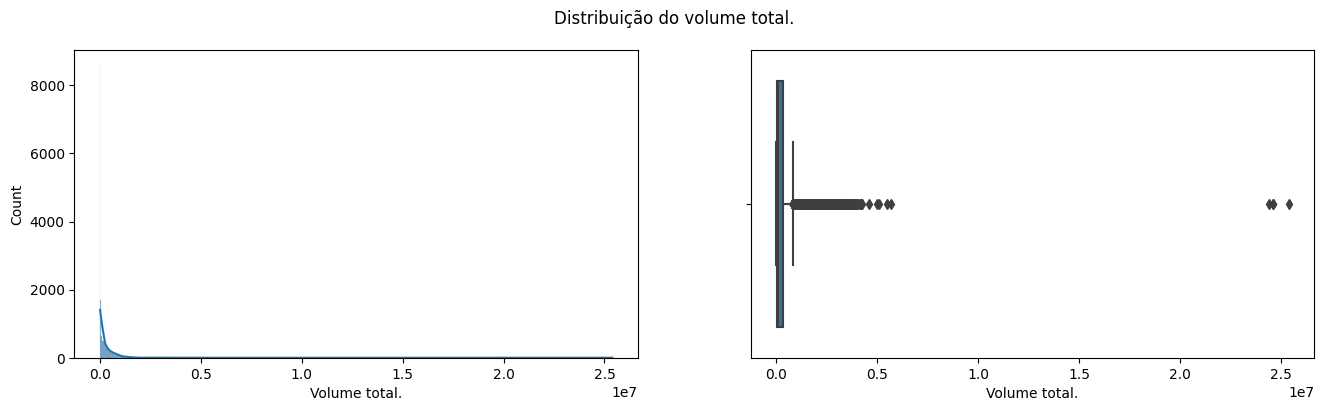

In [6]:
x = df_avocados.Total_Volume
fig, axes = plt.subplots(1,2, figsize=(16,4))


fig.suptitle('Distribuição do volume total.')

sns.histplot(ax = axes[0], data = df_avocados, x=x, kde=True)
axes[0].set_xlabel("Volume total.")


sns.boxplot(ax = axes[1], data = df_avocados, x=x,)
axes[1].set_xlabel("Volume total.")

Na categoria volume existe uma quantidade grande de outliers.

### Preço por cidade.

In [7]:
grp_price_region = df_avocados.groupby(['region']).agg(preco = ('AveragePrice','mean'))
grp_price_region = grp_price_region.sort_values(by='preco', ascending=False)
grp_price_region.head()

preco
region                       
SanFrancisco         1.790672
HartfordSpringfield  1.772905
Sacramento           1.607233
Charlotte            1.588972
RaleighGreensboro    1.577194

[]

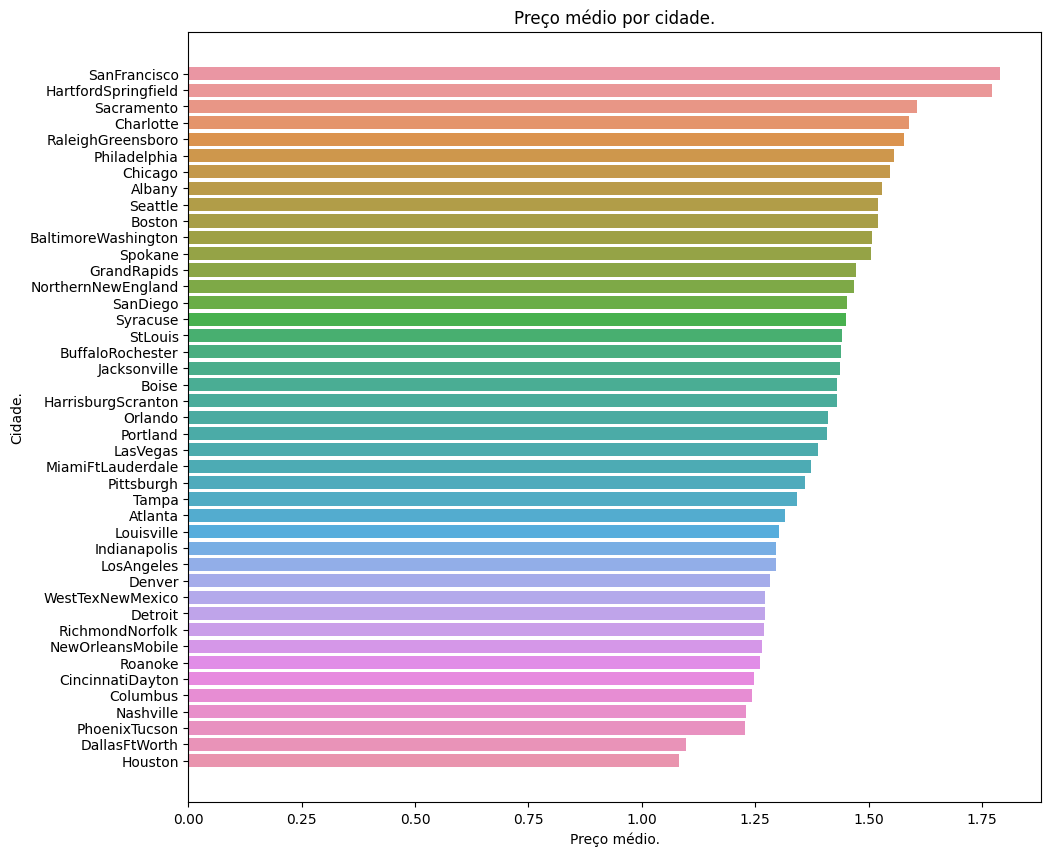

In [8]:
plt.figure(figsize=(11,10))

x = grp_price_region.preco
y = grp_price_region.index

sns.barplot(df_avocados, x=x, y=y)

plt.xlabel('Preço médio.')
plt.ylabel('Cidade.')
plt.title('Preço médio por cidade.')
plt.plot()

### Preço médio do abacate por tempo.

Text(0.5, 1.0, 'Preço médio do abacate por ano.')

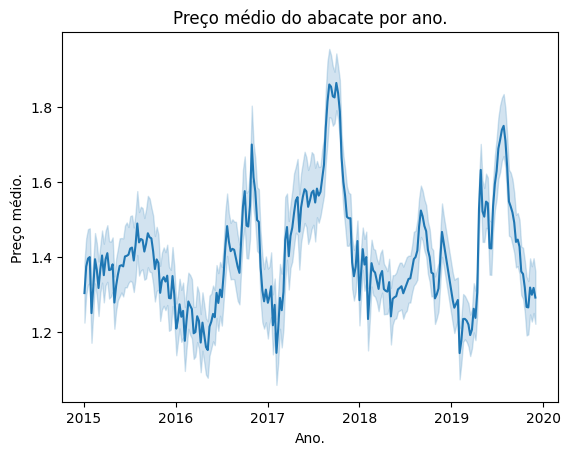

In [9]:
x = df_avocados.Date
y = df_avocados.AveragePrice

sns.lineplot(data=df_avocados, x=x, y=y)
plt.xlabel("Ano.")
plt.ylabel("Preço médio.")
plt.title('Preço médio do abacate por ano.')

[]

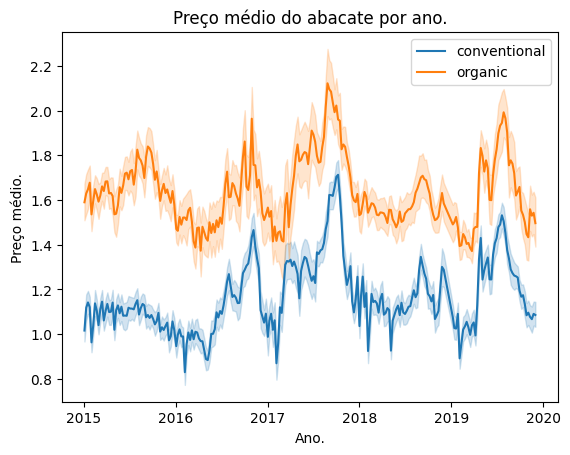

In [10]:
x = df_avocados.Date
y = df_avocados.AveragePrice

sns.lineplot(data=df_avocados, x=x, y=y, hue='type')

plt.xlabel("Ano.")
plt.ylabel("Preço médio.")
plt.title('Preço médio do abacate por ano.')
plt.legend()

plt.plot()

Podemos observar que o preço médio do abacate convencional é superior para todo o período análisado, porém as variações dos preço seguem a mesma tendência. Existe um evento que chama atenção, ele ocorre entro os anos de 2017 e 2018. Vou investigar melhor a causa desse evento.

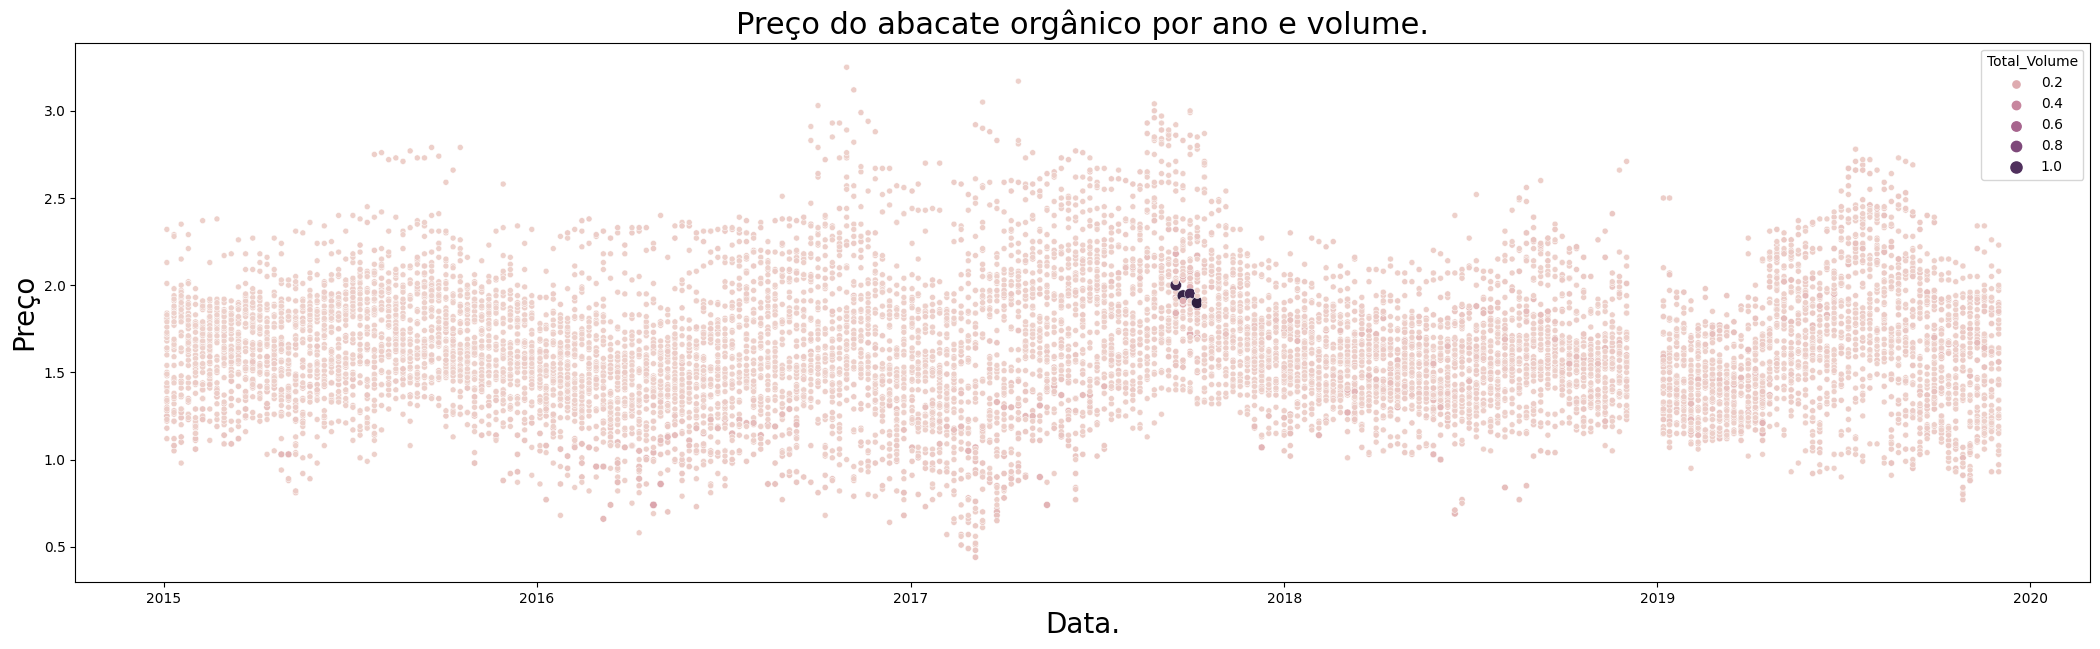

In [11]:
abacate_organico =df_avocados.type == "organic"
abacate_convencional = df_avocados.type == "conventional"


fig = plt.figure(figsize = (26, 7))

preco_organico = df_avocados.AveragePrice[abacate_organico]
volume_organico = df_avocados.Total_Volume[abacate_organico]
data_organico = df_avocados.Date[abacate_organico]

sns.scatterplot(x=data_organico, y=preco_organico, hue=volume_organico, size=volume_organico)

plt.xlabel("Data.", fontsize=20)
plt.ylabel("Preço", fontsize=20)
plt.title("Preço do abacate orgânico por ano e volume.", fontsize=22)
plt.show()

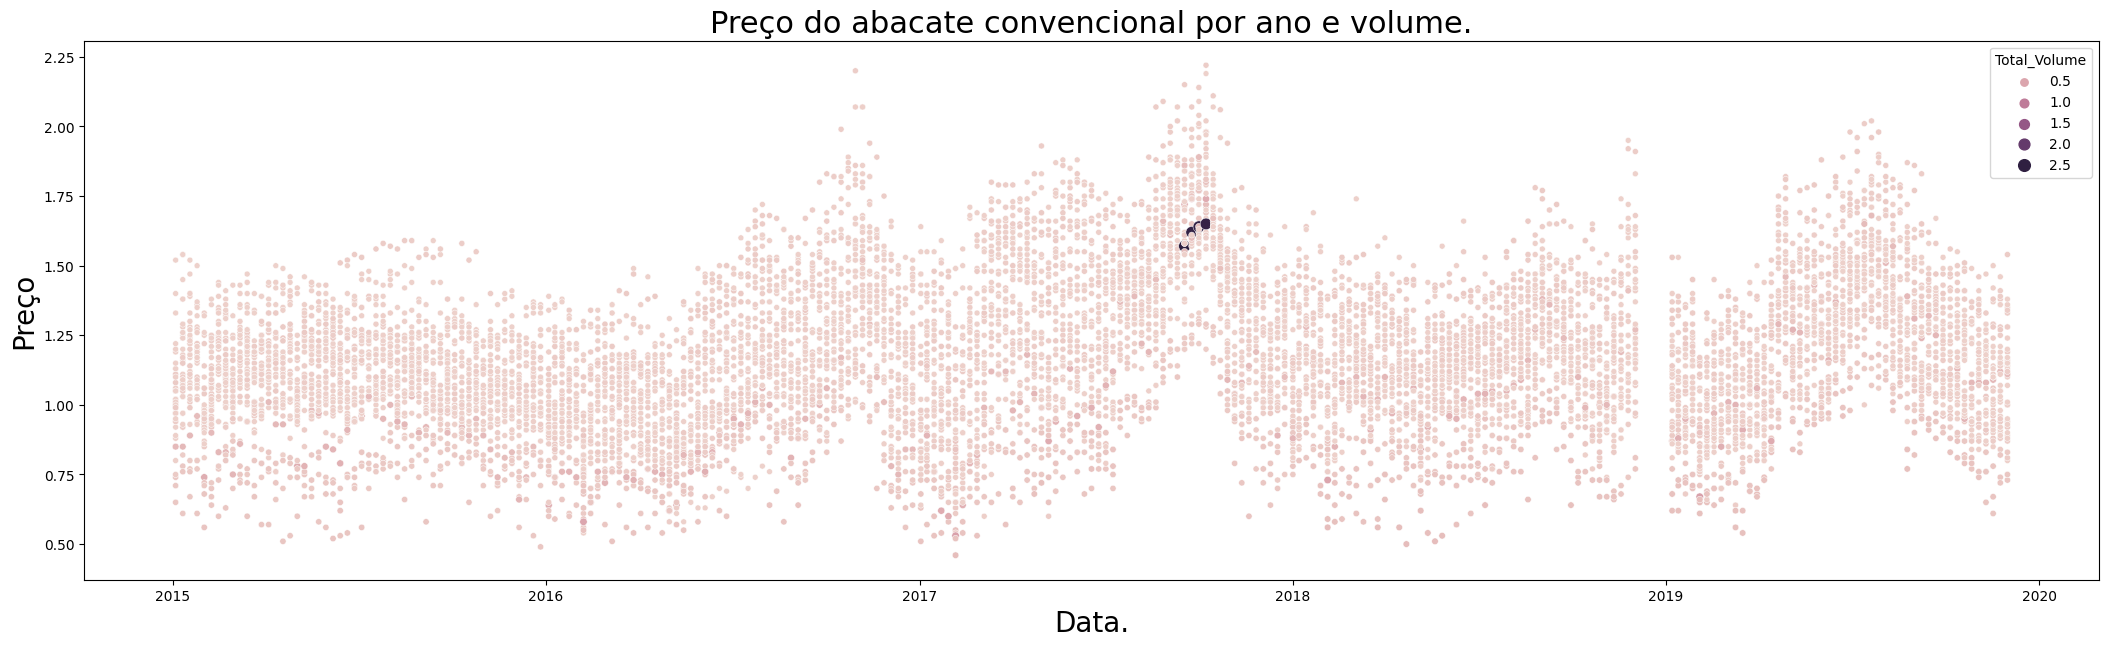

In [12]:
fig = plt.figure(figsize = (26, 7))

preco_convencional = df_avocados.AveragePrice[abacate_convencional]
volume_convencional  = df_avocados.Total_Volume[abacate_convencional]
data_convencional  = df_avocados.Date[abacate_convencional]

sns.scatterplot(x=data_convencional, y=preco_convencional, hue=volume_convencional, size=volume_convencional)

plt.xlabel("Data.", fontsize=20)
plt.ylabel("Preço", fontsize=20)
plt.title("Preço do abacate convencional por ano e volume.", fontsize=22)
plt.show()

Vizualizando os gráficos podemos observar duas momentos interesantes o primeiro tem haver com o preço elevado no período entre 2017 e 2018, com os gráficos vemos que existe um volume recorde de abacates vendido para o período analisado, isso explicaria o preço médio elevado para o período. E no segundo momento observamos um hiato de vendas para o período de 2019. Irei destrinchar esse hiato nas próximas perguntas.

### Contagem do tamanho dos anos.

In [13]:
grp_year = df_avocados.groupby('year').agg(total = ('year', 'count'))
grp_year

total
year       
2015   4471
2016   4472
2017   4470
2018   4214
2019   4128

2019 é o ano que menos tem dados dos abacates, o que já foi evidenciado anteriormente. Infelizmente os metadados não explicam a falta desses dados, nem mesmo para 2018.

### Correlação entre variáveis.

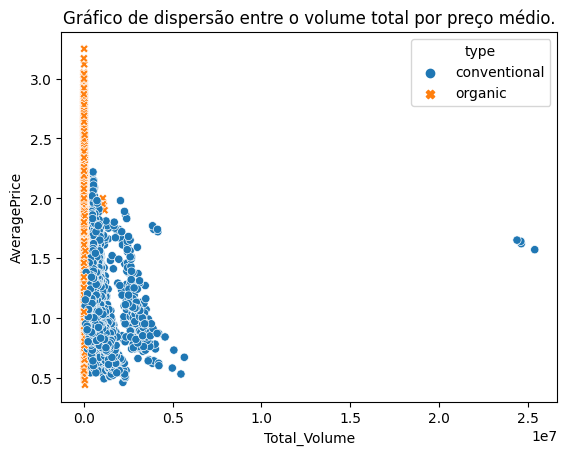

In [14]:
x = df_avocados.Total_Volume
y = df_avocados.AveragePrice

sns.scatterplot(data=df_avocados, x=x, y=y, hue='type', style="type")

plt.title('Gráfico de dispersão entre o volume total por preço médio.')
plt.show()

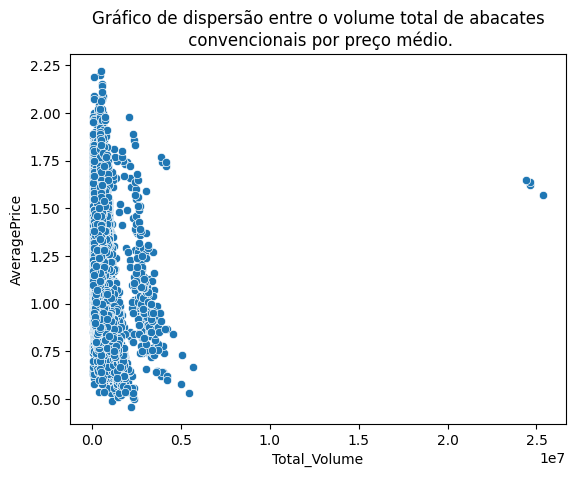

In [15]:
x = df_avocados.Total_Volume[abacate_convencional]
y = df_avocados.AveragePrice[abacate_convencional]

sns.scatterplot(x=x, y=y)

plt.title('Gráfico de dispersão entre o volume total de abacates\n convencionais por preço médio.')
plt.show()

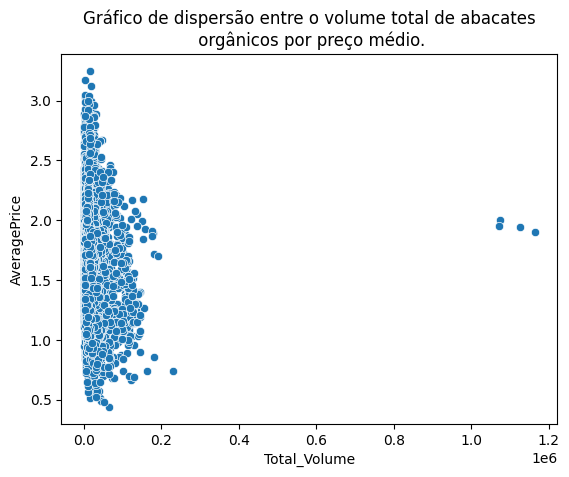

In [16]:
x = df_avocados.Total_Volume[abacate_organico]
y = df_avocados.AveragePrice[abacate_organico]

sns.scatterplot(x=x, y=y)

plt.title('Gráfico de dispersão entre o volume total de abacates\n orgânicos por preço médio.')
plt.show()

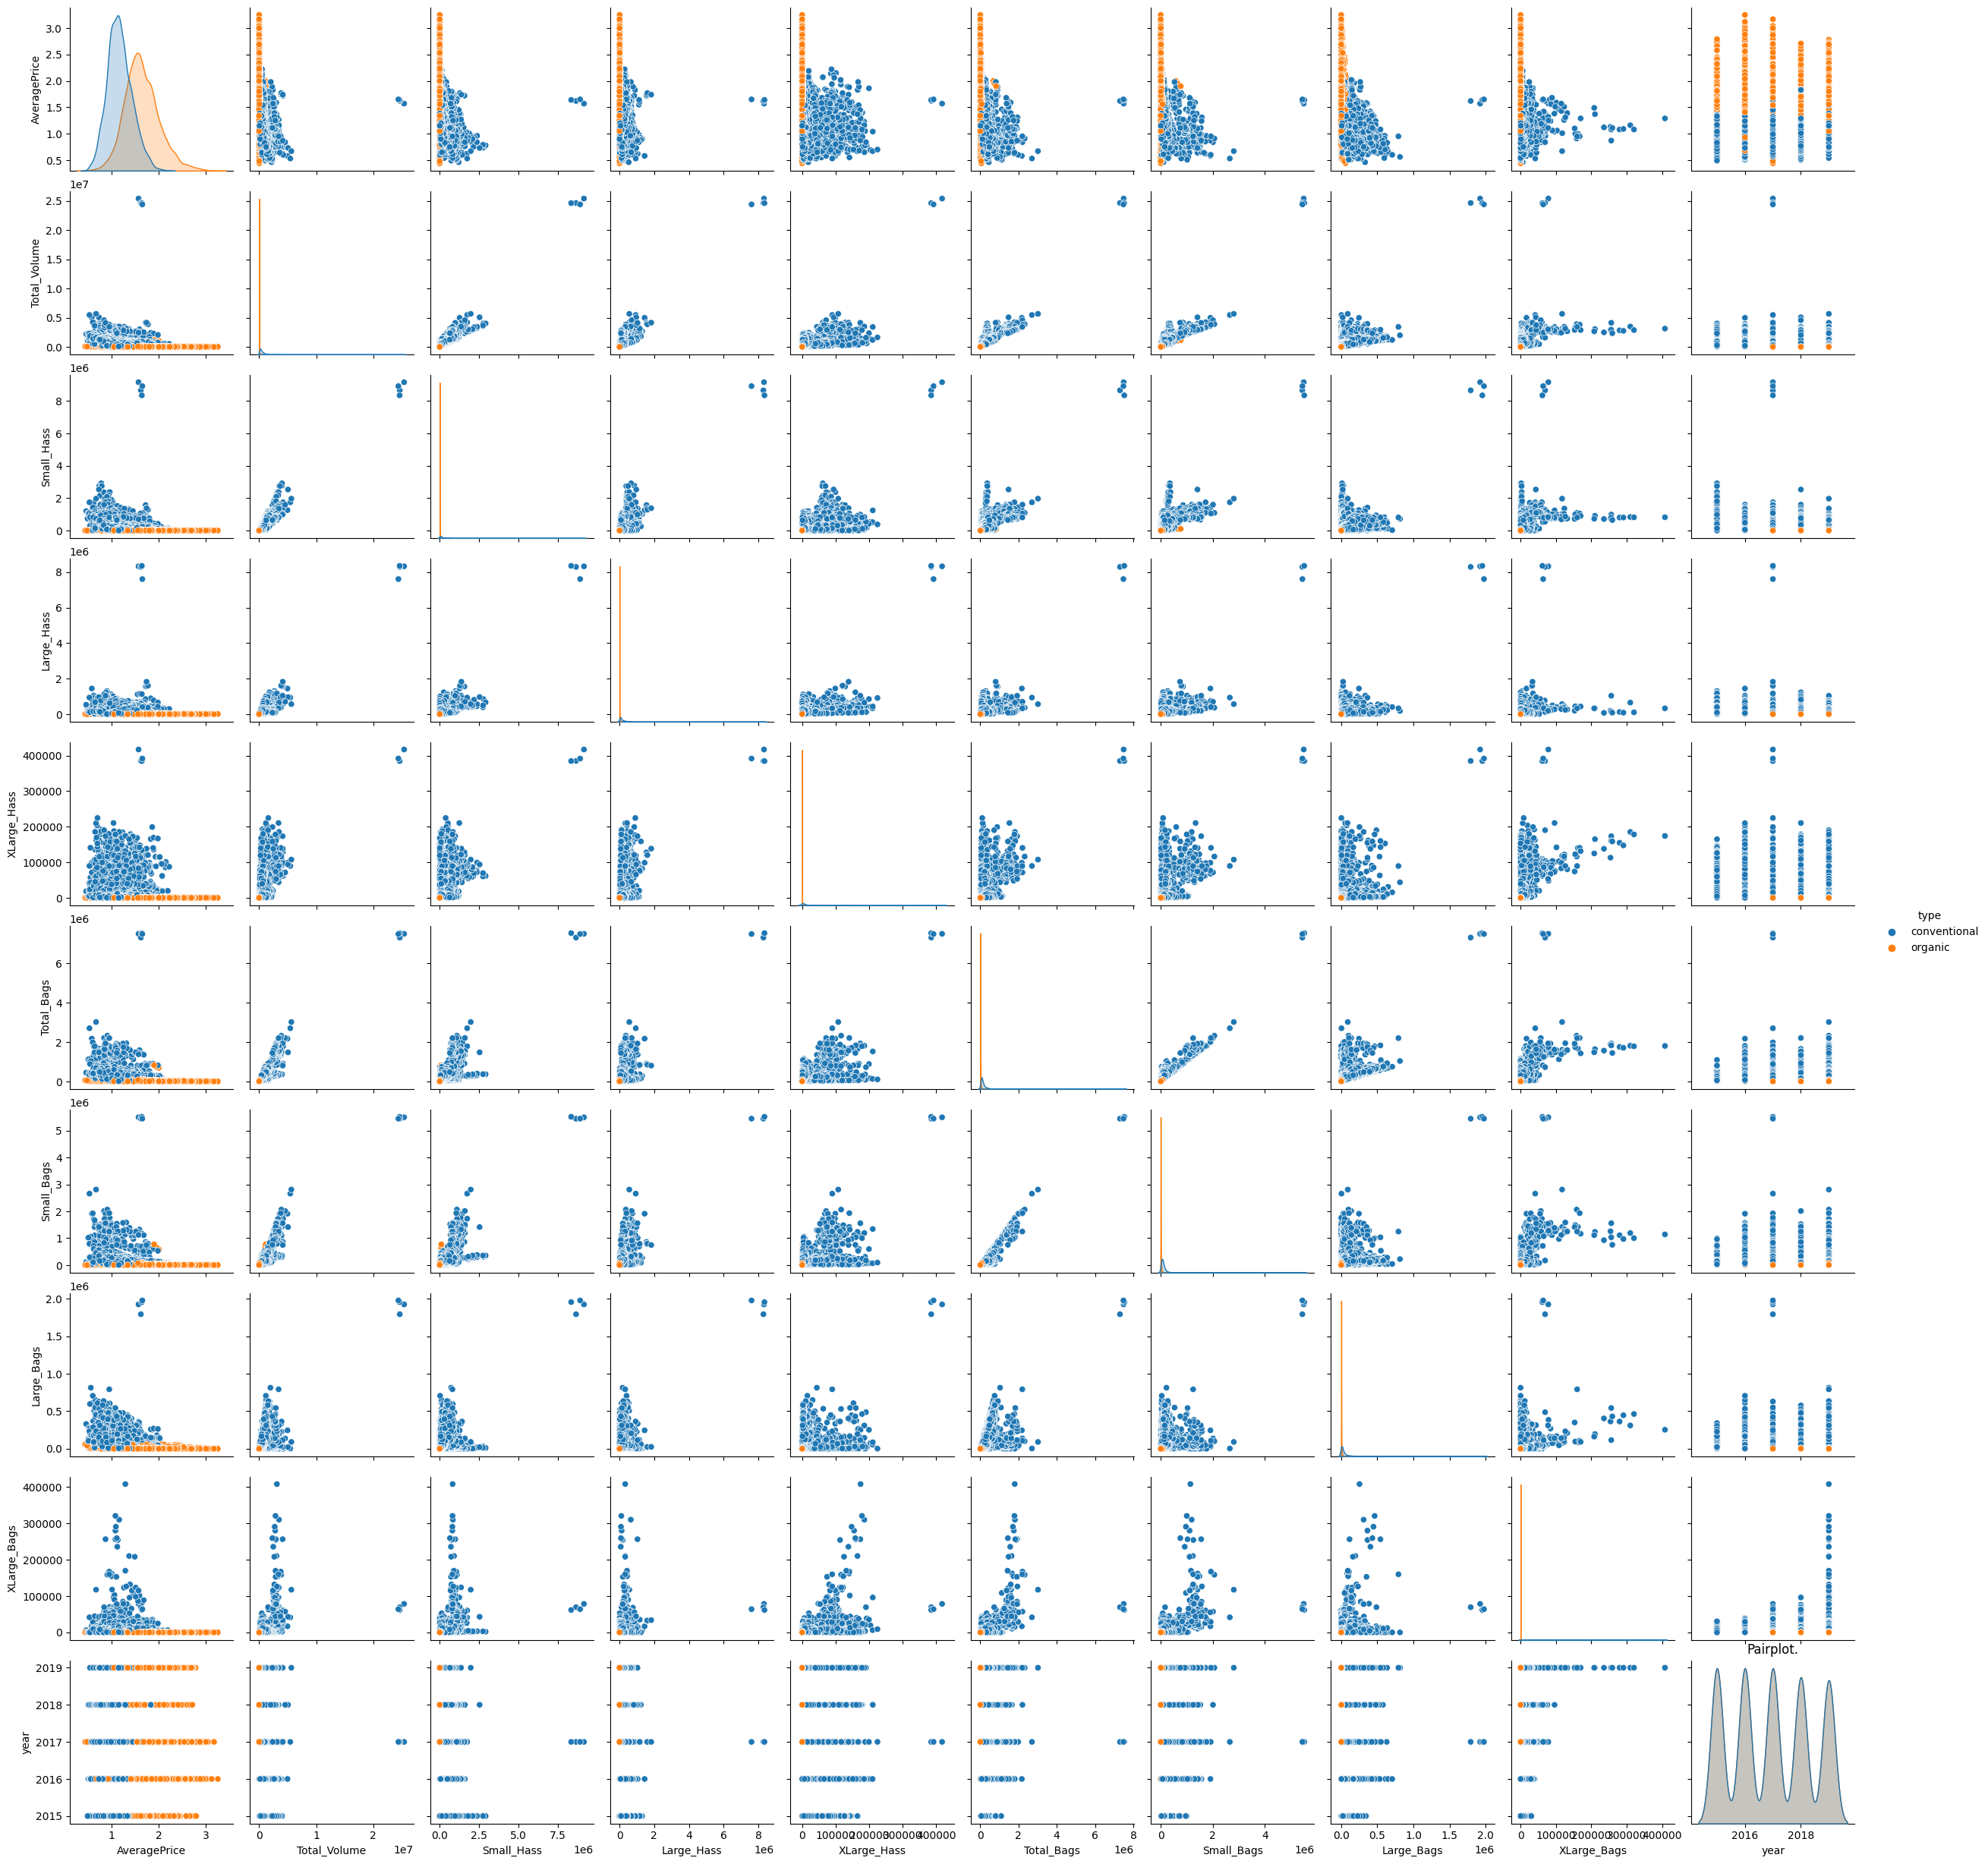

In [17]:
sns.pairplot(df_avocados, hue='type')
plt.title('Pairplot.')
plt.show()

### Conclusão.

Com a analise exploratória podemos observar que o preço do abacate variou bastante com o passar dos anos, e aparentemente não existe uma tendência de que o valor do abacate varie conforme o volume. Acredito que isso se deve ao fato da existência de muitos outliers, os quais irei tratar na próxima seção do projeto.


Vale ressaltar que existe uma diferença de preço médio entre os abacates orgânicos e convencionais, porém os mesmo tem uma variação de preço muito parecida.

# TRATANDO OUTLIERS

Irei utilizar a amplitude interquatílica para remover os valores destoantes.

In [21]:
def detect_outliers_iqr(df, feature):
    
    '''Função que retorna o indice dos outliers'''
    
    outlier_index = []
    for col in feature:
        #Primeiro quartil
        Q1 = df[col].quantile(0.25)
        #Terceiro quartil
        Q3 = df[col].quantile(0.75)

        #amplitude
        IQR = Q3-Q1

        #corte
        outlier_step = 1.5*IQR
        
        #lista com o indice dos cortes de outliers
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index

        outlier_index.extend(outlier_list_col)
    
    
    return outlier_index



In [22]:
indice = detect_outliers_iqr(df_avocados, ['Total_Volume'])
print(f' O valor relativo de outliers no dataset é {(len(indice)/len(df_avocados))*100}%')

 O valor relativo de outliers no dataset é 7.965984831073317%


In [23]:
#Retirando outliers
df_avocados = df_avocados.drop(index = indice)
print(f'Forma do df {df_avocados.shape}')
display(df_avocados.head())

Forma do df (20022, 12)


AveragePrice  Total_Volume  Small_Hass  Large_Hass  XLarge_Hass  \
0          1.22      40873.28     2819.50    28287.42        49.90   
1          1.41       2604.25      220.61       23.64         0.00   
2          1.19     166006.29    29419.03    47220.75     38568.95   
3          1.84       3966.00      244.34     2700.02        76.21   
4          1.82       2288.44     1438.04       53.73         0.00   

   Total_Bags  Small_Bags  Large_Bags  XLarge_Bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     2360.00     2360.00        0.00          0.0       organic  2015   
2    50797.56    44329.03     6468.53          0.0  conventional  2015   
3      945.43      838.34      107.09          0.0       organic  2015   
4      796.67      796.67        0.00          0.0       organic  2015   

              region  
0             Albany  
1   NewOrleansMobile  
2          Charlotte  
3          Nashville  
4  MiamiFtLauderdale

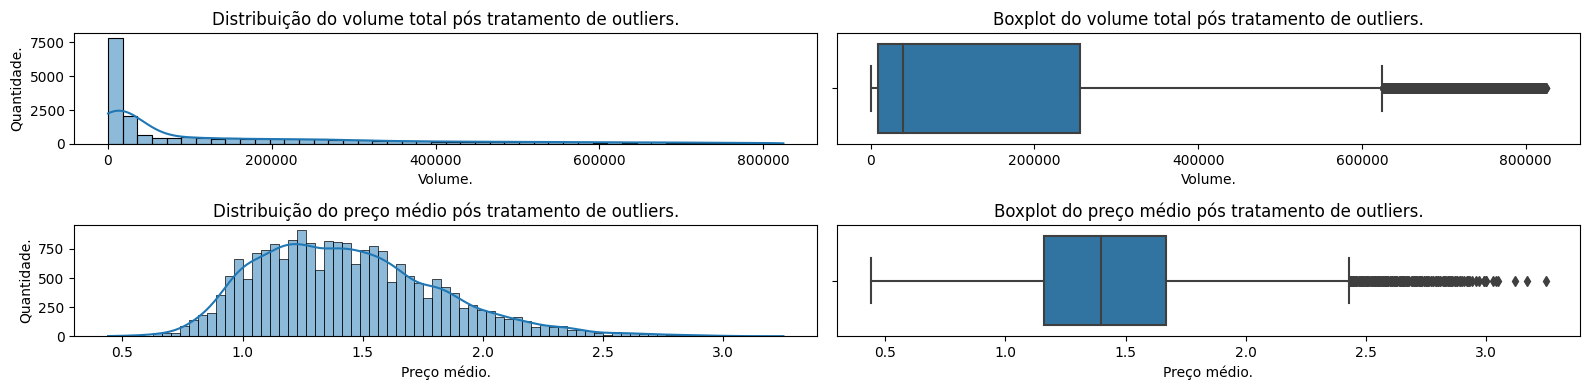

In [24]:
x = df_avocados.Total_Volume
x1 = df_avocados.AveragePrice
fig, axes = plt.subplots(2,2, figsize=(16,4))


axes[0,0].set_title('Distribuição do volume total pós tratamento de outliers.')
sns.histplot(ax = axes[0,0], data = df_avocados, x=x, kde=True)
axes[0,0].set_xlabel("Volume.")
axes[0,0].set_ylabel("Quantidade.")


axes[0,1].set_title('Boxplot do volume total pós tratamento de outliers.')
sns.boxplot(ax = axes[0,1], data = df_avocados, x=x,)
axes[0,1].set_xlabel("Volume.")

axes[1,0].set_title('Distribuição do preço médio pós tratamento de outliers.')
sns.histplot(ax = axes[1,0], data = df_avocados, x=x1, kde=True)
axes[1,0].set_ylabel("Quantidade.")
axes[1,0].set_xlabel("Preço médio.")

axes[1,1].set_title('Boxplot do preço médio pós tratamento de outliers.')
sns.boxplot(ax = axes[1,1], data = df_avocados, x=x1,)
axes[1,1].set_xlabel("Preço médio.")

fig.tight_layout()
plt.show()

As distribuições ficaram mais suaves.

Como os outliers já foram tratados irei plotar novamente os diagramas de dispersão.

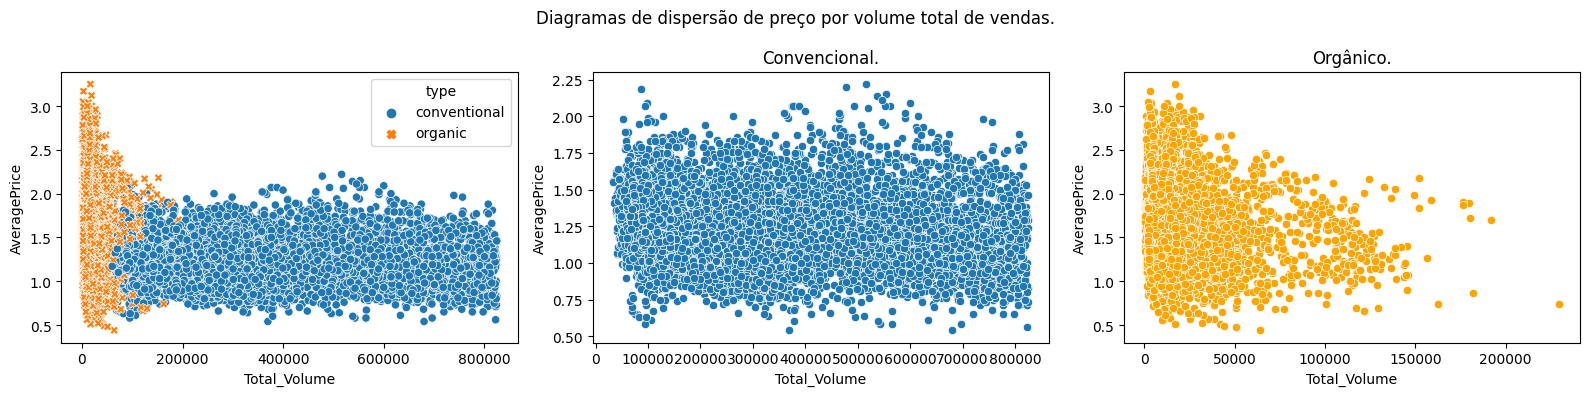

In [53]:
x1 = df_avocados.Total_Volume
y1 = df_avocados.AveragePrice
x2 = df_avocados.Total_Volume[abacate_convencional]
y2 = df_avocados.AveragePrice[abacate_convencional]
x3 = df_avocados.Total_Volume[abacate_organico]
y3 = df_avocados.AveragePrice[abacate_organico]


fig, axes = plt.subplots(1,3, figsize=(16,4))

fig.suptitle('Diagramas de dispersão de preço por volume total de vendas.')
sns.scatterplot(ax = axes[0], data=df_avocados, x=x1, y=y1, hue='type', style="type")



sns.scatterplot(ax = axes[1], x=x2, y=y2)
axes[1].set_title('Convencional.')

sns.scatterplot(ax =axes[2], x=x3, y=y3, color='orange')
axes[2].set_title('Orgânico.')

#plt.title('Gráfico de dispersão entre o volume total de abacates\n orgânicos por preço médio.')
fig.tight_layout()
plt.show()

# Modelo.

In [62]:
df_avocados.head()

AveragePrice  Total_Volume  Small_Hass  Large_Hass  XLarge_Hass  \
0          1.22      40873.28     2819.50    28287.42        49.90   
1          1.41       2604.25      220.61       23.64         0.00   
2          1.19     166006.29    29419.03    47220.75     38568.95   
3          1.84       3966.00      244.34     2700.02        76.21   
4          1.82       2288.44     1438.04       53.73         0.00   

   Total_Bags  Small_Bags  Large_Bags  XLarge_Bags          type  year  \
0     9716.46     9186.93      529.53          0.0  conventional  2015   
1     2360.00     2360.00        0.00          0.0       organic  2015   
2    50797.56    44329.03     6468.53          0.0  conventional  2015   
3      945.43      838.34      107.09          0.0       organic  2015   
4      796.67      796.67        0.00          0.0       organic  2015   

              region  
0             Albany  
1   NewOrleansMobile  
2          Charlotte  
3          Nashville  
4  MiamiFtLauderdale

In [116]:
#Normalizacao 
from sklearn.preprocessing import MinMaxScaler
#Dividir em dados de teste e teste
from sklearn.model_selection import train_test_split
#modelo
from sklearn.linear_model import LinearRegression
#avaliacao
from sklearn.metrics import mean_squared_error

## Normalizando.

In [175]:
scaler_min_max = MinMaxScaler()

df_avocados_norm = pd.DataFrame(scaler_min_max.fit_transform(pd.get_dummies(df_avocados.drop(columns=['year', 'region']))))

In [176]:
df_avocados_dummies = pd.get_dummies(df_avocados.drop(columns='year'))

df_avocados_y = df_avocados.AveragePrice

#sem dummies
df_avocados_x = df_avocados_norm[df_avocados_norm.columns[1:]]

#com dummies
df_avocados_x_dummies = df_avocados_norm

In [177]:
df_avocados_x_dummies


0         1         2         3         4         5         6   \
0      0.277580  0.049455  0.004920  0.038056  0.000259  0.017809  0.017339   
1      0.345196  0.003055  0.000385  0.000032  0.000000  0.004326  0.004454   
2      0.266904  0.201174  0.051332  0.063527  0.200445  0.093105  0.083665   
3      0.498221  0.004706  0.000426  0.003632  0.000396  0.001733  0.001582   
4      0.491103  0.002672  0.002509  0.000072  0.000000  0.001460  0.001504   
...         ...       ...       ...       ...       ...       ...       ...   
20017  0.270463  0.250854  0.141860  0.048194  0.009583  0.161316  0.140082   
20018  0.398577  0.102210  0.015470  0.003248  0.000000  0.133990  0.137113   
20019  0.483986  0.011394  0.001940  0.000826  0.000000  0.014214  0.013685   
20020  0.252669  0.106953  0.005446  0.094217  0.000400  0.027612  0.013376   
20021  0.555160  0.010069  0.000012  0.003670  0.000192  0.010295  0.010596   

             7         8    9    10  
0      0.001457  0.000000  1.0  0.0  
1      0.000000  0.000000  0.0  1.0  
2      0.017797  0.000000  1.0  0.0  
3      0.000295  0.000000  0.0  1.0  
4      0.000000  0.000000  0.0  1.0  
...         ...       ...  ...  ...  
20017  0.037679  0.001844  1.0  0.0  
20018  0.001255  0.000000  0.0  1.0  
20019  0.001389  0.000000  0.0  1.0  
20020  0.019842  0.014563  1.0  0.0  
20021  0.000008  0.000000  0.0  1.0  

[20022 rows x 11 columns]

### Teste sem dummies.

In [178]:
x_train, x_test, y_train, y_test = train_test_split(df_avocados_x, df_avocados_y, train_size=0.8)

In [179]:
modelo =  LinearRegression()

modelo.fit(x_train, y_train)

p = modelo.predict(x_test)

In [180]:
#Verificando o resultado
r_sq = modelo.score(x_test, y_test)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.35599677512196415


In [181]:
print('Intercepto:', modelo.intercept_)

Intercepto: 1.440414230078786


In [182]:
coeff_df = pd.DataFrame(modelo.coef_,x_test.columns,columns=['Coefficient'])
coeff_df

Coefficient
1     -6.988607
2      4.630294
3      6.649251
4      1.422625
5  -1390.582652
6   1354.579208
7    929.353997
8    135.020599
9     -0.201442
10     0.201442

In [168]:
mean_squared_error(y_test, p)

0.07671961899037366

Text(0.5, 1.0, 'Linear regression for Avocado dataset')

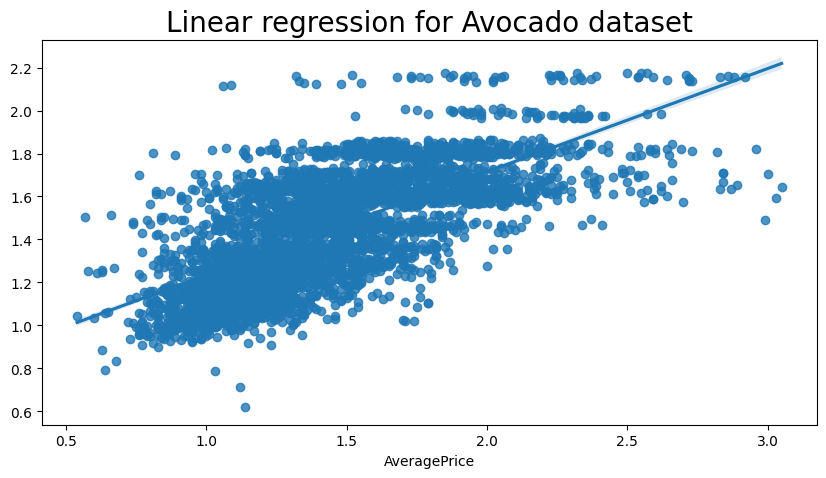

In [169]:
plt.figure(figsize = (10,5))
sns.regplot(x=y_test,y=p)
plt.title('Linear regression for Avocado dataset', fontsize = 20)

In [ ]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train2,y_train2,X_test2,y_test2,y_pred)]

lm_score2 = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score2.insert(0, 'Model', 'Linear Regression')
lm_score2